***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 5:** *Processing Images with OpenCV and CNNs*
> 
> **Performed by:** *Alexandra Konjevic*, group *FAF-213*
> 
> **Verified by:** Elena Graur, asist. univ.

## Task 1.
- Using OpenCV, write a function to blur an image. Adjust the parameters and explain your
approach. Plot the initial image and the blurred one in the same plot using Matplotlib
subplots.
- Using OpenCV, write a function to sharpen an image. Adjust the parameters and explain
your approach. Plot the initial image and the sharpened one in the same plot using
Matplotlib subplots.


For this task, I initially used the OpenCV library to read a random image from the dataset. The `cv2.imread()` function reads images in BRG format by default, so I converted it to RGB format using the `cv2.cvtColor()` function.

For the blurring task, I used two kernels:
- normalized box blur kernel:
$$
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

- Gaussian blur kernel:
$$
\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

I applied both kernels to the image using the `cv2.filter2D()` function and displayed the original and blurred images side by side.

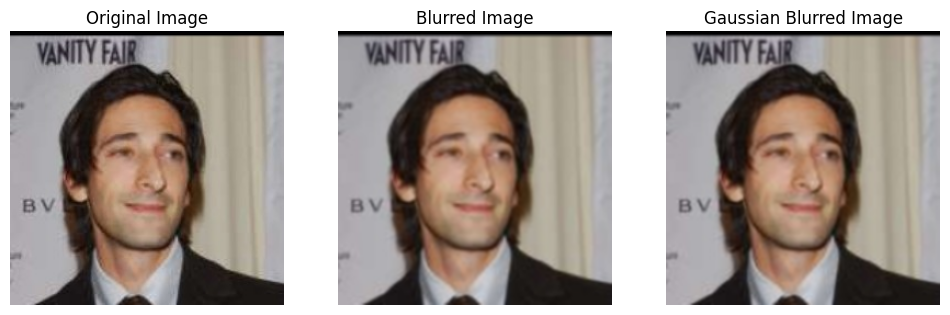

In [179]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

images = glob('./images/*.jpg')
img = images[23]
# img = ('./images/sample.jpg')
img_cv2 = cv2.imread(img)
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

#        |1, 1, 1|
# 1/9 *  |1, 1, 1|
#        |1, 1, 1|
kernel_3x3 = np.ones((3, 3), np.float32) / 9

#        |1, 2, 1|
# 1/16 * |2, 4, 2|
#        |1, 2, 1|
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16

blurred = cv2.filter2D(img_rgb, -1, kernel_3x3)
gaussian_blurred = cv2.filter2D(img_rgb, -1, gaussian_kernel)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Image')
plt.imshow(blurred)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Blurred Image')
plt.imshow(gaussian_blurred)
plt.axis('off')

plt.show()

For the sharpening task, I also used two different kernels:
- Kernel #1:
$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

- Kernel #2:
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

I applied both kernels to the image using the `cv2.filter2D()` function and displayed the original and sharpened images side by side.

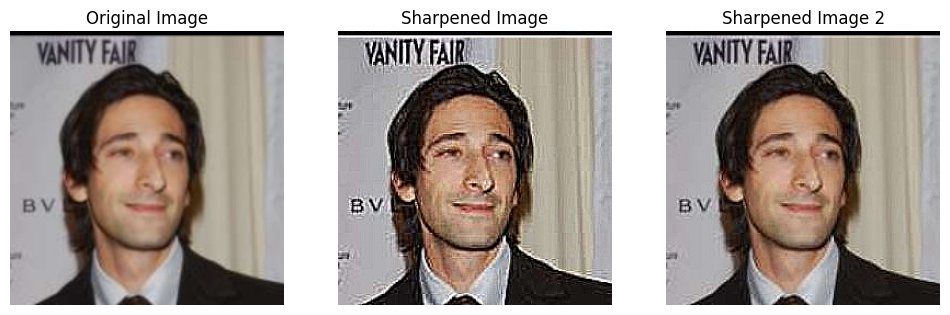

In [180]:
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

kernel_sharpening_2 = np.array([[0, -1, 0],
                                [-1, 5, -1],
                                [0, -1, 0]])

sharpened = cv2.filter2D(img_rgb, -1, kernel_sharpening)
sharpened_2 = cv2.filter2D(img_rgb, -1, kernel_sharpening_2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sharpened Image 2')
plt.imshow(sharpened_2)
plt.axis('off')

plt.show()

## Task 2. Implement a face detection system using OpenCV. The function should take as input one image, and output the result as the coordinates of the face in case the image contains a face. If the image does not contain any faces, return None. Assume that the image contains no more than one face. 

For the task of recognition of face, I used the following steps:
- create a `cv2.CascadeClassifier()` object and load the pre-trained Haar cascade model for face detection
- convert the image to grayscale, because face detection performs better on grayscale images
- detect faces using the `detectMultiScale()` function
- print "No faces found" if no faces are detected and return
- print coordinates of the detected faces and draw rectangles around them

Coordinates of faces: 67, 68


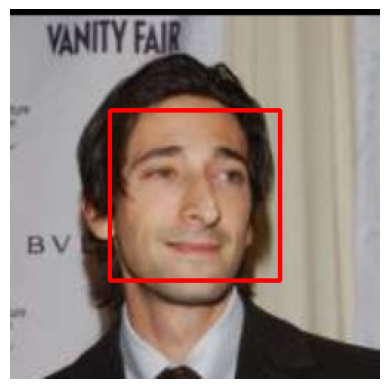

No faces found


In [181]:
def detect_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # pre-trained Haar cascades for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert image to grayscale
    faces = face_cascade.detectMultiScale(gray, 1.1, 5) # Detect the faces in the image

    if len(faces) == 0:
        print('No faces found')
        return
    
    x, y = faces[0][:2]
    print(f'Coordinates of faces: {x}, {y}')

    # draw rectangle around the face
    cv2.rectangle(image, (x, y), (x + faces[0][2], y + faces[0][3]), (255, 0, 0), 2)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image_without_face = glob('./image_no_face.jpeg')
img_no_face = image_without_face[0]
img_no_face_cv2 = cv2.imread(img_no_face)
img_no_face_rgb = cv2.cvtColor(img_no_face_cv2, cv2.COLOR_BGR2RGB)

detect_face(img_rgb)
detect_face(img_no_face_rgb)

## Task 3. Implement a system that detects whether a photo is accepted for a passport or not, by using OpenCV. You can be creative in determining the optimal strategy, but the system should follow the provided requirements:
- the photo should be colour
- the photo should be in portrait orientation or square (assume that the image given as input is not rotated)
- the eyes of the subject should be at the same level (with a max. error of 5 pixels)
- the photo should contain only one person
- the head should represent 20% to 50% of the area of the photo
- there are no requirements regarding the background of the photo.

For the task below, I used the following checks:
- check if the image is colored or not: if the image has 3 channels, it is colored; otherwise, it is grayscale
- check if the image is portrait or square: if the height is greater or equal to the width, it is portrait or square; otherwise, it is landscape
- check for number of faces: return false if there are no faces detected or more than one face detected
- eyes position check: for this step, I used the `haarcascade_eye.xml` pre-trained model to detect eyes in the image. If the eyes are detected, and if the top y coordinates of the eyes are less than 5 pixels apart, I considered it as a valid image; otherwise, I returned false.
- face proportion check: I checked the face area and image area:
```
    face_area = w * h
    image_area = height * width
```
and used the formula `0.2 * image_area <= face_area <= 0.5 * image_area` to determine if the face area is within the acceptable range.


In [182]:
def is_colored(image):
    if len(image.shape) == 3:
        return True
    return False

def is_portrait_or_square(image):
    if image.shape[0] >= image.shape[1]:
        return True
    return False

def is_passport_photo(image):
    errors = []

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    if len(faces) == 0:
        errors.append('No faces found')
        return errors
    
    if len(faces) > 1:
        errors.append('More than one face found')
        return errors
    
    if not is_colored(image):
        errors.append('Image is not colored')

    if not is_portrait_or_square(image):
        errors.append('Image is not portrait or square')

    height, width, _ = image.shape

    # Get face coordinates
    x, y, w, h = faces[0]
    face_area = w * h
    image_area = height * width

    # Check head area proportion
    if not (0.2 * image_area <= face_area <= 0.5 * image_area):
        errors.append('Head area proportion is not correct')

    # Check eyes
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Check if eyes are at the same level (within 5 pixels)
    eye_y_coords = [ey for (_, ey, _, _) in eyes]
    if len(eye_y_coords) < 2:
        errors.append('Eyes not found')
        return errors
    
    if abs(eye_y_coords[0] - eye_y_coords[1]) > 5:
        errors.append('Eyes are not at the same level')

    if len(errors) == 0:
        print('This is a passport photo')
    else:
        print('This is not a passport photo')
        return errors

    return errors


img_sample = cv2.imread('./sample.jpg')
img_sample_rgb = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)
is_passport_photo(img_sample_rgb)

This is not a passport photo


['Image is not portrait or square', 'Head area proportion is not correct']

In [183]:
is_passport_photo(img_rgb)

This is a passport photo


[]

## Task 4. Download the provided image dataset and unzip it in the same folder as this notebook. You can use the images folder as data and the labels.csv file for the labels. Split your data into 3 parts the train, the validation and test sets.

For the next task, I created, first of all, a class `ImageDataset` that has the method `__getitem__`, which applies some changes to all the images in the dataset. This function:
- creates a full path to the image
- converts the image to RGB format
- applies transformations to the image (resizing to 128x128, converting to tensor, and normalizing the image)

The function returns the transformed image and its label as a PyTorch tensor.

For splitting the dataset into training, validation and test sets, I use the `split_dataset()` function, which:
- reads the CSV file containing image paths and labels into a `DataFrame`
- computes the sizes of the train (65%), validation (20%), and test (15%) subsets
- generates a random permutation of indices using `torch.randperm()`
- uses the indices to split the `DataFrame` into `train_dataset`, `val_dataset`, and `test_dataset`.


In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import os

# Image Dataset
class ImageDataset(Dataset):
    def __init__(self, dataframe, root_dir: str, transform):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_relative_path = self.dataframe.iloc[idx, 0] # 0th column is the image path
        img_path = os.path.join(self.root_dir, img_relative_path) # Create the full image path
        image = Image.open(img_path).convert('RGB') # Open the image and convert it to RGB
        label = self.dataframe.iloc[idx, 1] # 1st column is the label
        if self.transform:
            image = self.transform(image) # Apply transformations
        return image, torch.tensor(label, dtype=torch.float32) # Return image and label

# Split Dataset Function
def split_dataset(labels_csv_path):
    dataset = pd.read_csv(labels_csv_path)
    train_size = int(0.65 * len(dataset))
    val_size = int(0.2 * len(dataset))
    test_size = len(dataset) - train_size - val_size
    indices = torch.randperm(len(dataset)).tolist()
    train_dataset = dataset.iloc[indices[:train_size]]
    val_dataset = dataset.iloc[indices[train_size:train_size + val_size]]
    test_dataset = dataset.iloc[indices[train_size + val_size:]]
    return train_dataset, val_dataset, test_dataset

# Paths
labels_csv_path = "./labels.csv"
root_dir = "./"

# Split the dataset
train_df, val_df, test_df = split_dataset(labels_csv_path)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize the image to 128x128
    transforms.ToTensor(), # Convert the image to a PyTorch Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), # Normalize the image with ImageNet mean and standard deviation
])

# Create datasets
train_dataset = ImageDataset(train_df, root_dir=root_dir, transform=transform)
val_dataset = ImageDataset(val_df, root_dir=root_dir, transform=transform)
test_dataset = ImageDataset(test_df, root_dir=root_dir, transform=transform)

print("Train dataset: ", len(train_dataset))
print("Validation dataset: ", len(val_dataset))
print("Test dataset: ", len(test_dataset))

Train dataset:  31
Validation dataset:  9
Test dataset:  8


## Task 5. Using Tensorflow or PyTorch, develop a CNN model that will learn how to classify the images as accepted or not for passport photos (binary classifier). Train your model on the train set. It is encouraged to use the validation set for hyperparameter optimization

Using the split dataset from the previous task, I created `DataLoader` objects for the training, validation, and test sets (iterable batches of data).

After that, using the PyTorch library, I created a CNN model. A Convolutional Neural Network (CNN) is a type of deep learning model designed to process grid-like data, such as images. It uses convolutional layers to automatically extract spatial features and fully connected layers to perform classification or regression.

The CNN model consists of the following layers:
- `Conv2d`: Convolutional layers extract spatial features from input images.
- `ReLU`: Activation function adds non-linearity.
- `MaxPool2d`: Reduces spatial dimensions, helping with computation and feature generalization.
- `Flatten`: Converts the 3D feature map into a 1D vector for fully connected layers.
- `Linear`: Fully connected layers for learning high-level features and performing classification.
- `Sigmoid`: Activation function for binary classification, outputting probabilities in [0, 1].

I used the Hyperparameter Tuning, which is a process of finding the best set of hyperparameters for a machine learning model. I used the `Adam` optimizer and the `BCELoss` loss function, a batch size of 16 and 32, number of epochs 20 and 40, and a learning rate of 0.01 and 0.02.

After that, for each combination of hyperparameters, I trained the model on the training set and evaluated it on the validation set. I saved the model with the best validation accuracy and used it to evaluate the test set.

For every combination of hyperparameters, the overall performance of the model is calculated, and the best one is then printed.

The performance of the model is primarily evaluated using validation loss, which is computed using Binary Cross-Entropy Loss (BCELoss). The "best" model is selected based on the lowest validation loss, ensuring the chosen model generalizes well to unseen data.

In [224]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import ParameterGrid

# Create DataLoaders
# iterable batches of data from the dataset
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True) # shuffles the dataset at the start of each epoch
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Model Definition
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(16 * 16 * 64, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
).to(device)

criterion = nn.BCELoss() # measures how far the model's predictions are from the true labels
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hyperparameter Tuning
params = {"batch_size": [16, 32], "num_epochs": [20, 40], "lr": [0.01, 0.02]}
param_values = ParameterGrid(params)

best_performance = float("inf")
best_model = None

for i, param in enumerate(param_values, 1):
    batch_size = param["batch_size"]
    num_epochs = param["num_epochs"]
    lr = param["lr"]

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels.float().view_as(outputs))
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, labels.float().view_as(outputs)).item()

        if val_loss < best_performance:
            best_performance = val_loss
            best_model = model

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model = best_model
model.eval()

print("Best performance:", best_performance)
print("Best hyperparameters:", param)


Best performance: 23.616159439086914
Best hyperparameters: {'batch_size': 32, 'lr': 0.02, 'num_epochs': 40}


## Task 7. Conclusions

### 1. Which approach performs better on this task and why?

- Face Detection and Passport Photo Validation: For face detection and validating passport photos (Task 2 and Task 3), OpenCV is effective because it uses pre-trained Haar cascades or DNN models, which are computationally efficient for these tasks.Also, It performs well on smaller, less complex datasets and scenarios. However, if the task involves nuanced classifications (e.g., predicting whether a passport photo meets strict criteria), a CNN performs better due to its ability to learn complex patterns.
- Binary Classification (Task 5): CNNs perform better for classifying passport photos as accepted or not because they can extract hierarchical features from images:
  - Convolutional layers detect edges, textures, and complex patterns.
  - Fully connected layers combine these features to make decisions.

The advantage of CNNs is their ability to generalize well with sufficient data and proper training, making them suitable for more complex image classification tasks.

### 2. Is it useful to use a CNN for this task? Why?

Yes, CNNs are useful for such a task. CNNs excel at capturing spatial hierarchies in images, which is crucial for identifying features like face alignment, symmetry (e.g., eyes at the same level), proportions of the head relative to the image area. OpenCV works well for predefined rules and simpler conditions, but CNNs adapt and improve with more data and training, making them suitable for real-world variability.

### 3. How can you improve the results obtained with the CNN?

- Data Augmentation: Apply techniques like rotation, flipping, brightness adjustments, and cropping to artificially expand the training dataset and make the model more robust.
- Fine-Tune Hyperparameters: Use techniques like grid search or Bayesian optimization to find the best learning rate, batch size, and number of layers/neurons.
- Pretrained Models: Use transfer learning with a pretrained CNN (e.g., VGG16, ResNet) and fine-tune it for the passport photo classification task.
- Class Balancing: Ensure the dataset has balanced classes (equal True and False labels).
- Regularization: Use dropout, weight decay, and batch normalization to prevent overfitting.

### 4. What can you say about the dataset?

The dataset provides labeled data, enabling supervised learning and is well structured and organized for tasks like binary classification. It, however, is small, so the CNN might overfit and fail to generalize. If the labels are imbalanced (e.g., more True than False), the model might bias towards the dominant class.

### 5. Do you think such systems would work in a real-life scenario?

While the systems developed in this project demonstrate strong performance on controlled datasets, applying them in real-life scenarios presents challenges. In real-world settings, images often vary in quality, lighting, orientation, and subject diversity. For example, passport photos may have non-standard backgrounds, slight misalignments, or subtle variations in facial features that are not adequately captured in the training data. Such variations can reduce the system's accuracy and reliability.

Additionally, the requirements for passport photo validation are strict, and even minor errors (e.g., a slight misalignment of the eyes or incorrect scaling of the head) could lead to rejection. This level of precision requires robust systems with high generalization capabilities.

Despite these challenges, such systems could be used in real-life scenarios with careful implementation. They could serve as a pre-screening tool, flagging images that are clearly invalid and significantly reducing the workload for manual review. Integrating the automated system with manual validation ensures both efficiency and reliability.

### 6. What approaches can be used to obtain more data?
- Data augmentation - artificially increase the size of the dataset by applying transformations;
- Synthetic data generation - create new data samples using generative models or image editing software;
- Crowdsourcing - collect labeled data from online platforms or crowdsourcing services;
- Publicly available datasets - use existing datasets from sources like Kaggle, ImageNet, or Open Images.